In [873]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [874]:
#read new combined cleaned dataset
df = pd.read_csv("..\Project 1\WSB Data\WSB.csv", index_col=0)

In [875]:
#sort by num_mentions rolled up into ticker
df_num_mentions =df.sort_values(["num_mentions","ticker"],ascending=False).groupby("ticker")
df_num_mentions = df.groupby('ticker')['num_mentions'].sum().sort_values(ascending=False)
df_num_mentions.head(20)

ticker
GME     175070
BB       58630
AMC      46705
PLTR     27469
CLOV     15931
TSLA     13825
NOK      12989
SPY      11561
WISH     11021
RKT      10726
CLNE      8294
AMD       6773
TLRY      6582
UWMC      6251
NIO       5996
ALL       5950
AAPL      5901
SNDL      5641
APHA      5136
WKHS      4699
Name: num_mentions, dtype: int64

In [876]:
df_num_mentions.value_counts()

1       629
2       565
3       247
4       209
6       153
       ... 
85        1
97        1
143       1
149       1
1630      1
Name: num_mentions, Length: 408, dtype: int64

Want to show outliers here
- basically want to show on WallStreetBets that there was a distinct popularity around a few names

Text(0.5, 1.0, 'Predicted Positive & Negative context')

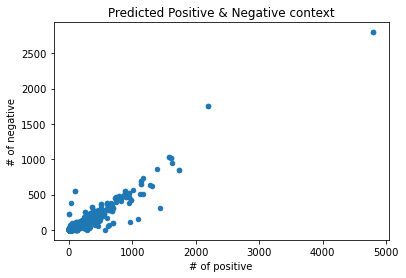

In [877]:
df_test = df[['pos_count','neg_count']]
df_test.plot.scatter(x = 'pos_count', y = 'neg_count')
plt.xlabel('# of positive')
plt.ylabel('# of negative')
plt.title("Predicted Positive & Negative context")

Chart to show which names were most widely discussed and mentioned (below)
- GME, AMC and BB widely shown to be outliers

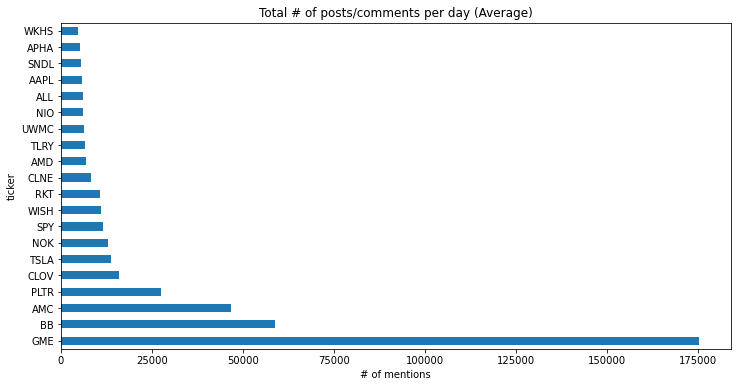

In [878]:
# making a chart off of num_mentions (above)
plt.figure(figsize = (12,6))
plt.title("Total # of posts/comments per day (Average)")
plt.xlabel('# of mentions')
df_num_mentions.head(20).plot(kind = 'barh')

2nd Chart involving the percentage of mentions of a stock in a single day
* want to reinforce why we chose GME AMC and BB
* can show NAPA as an outlier because of only 3 data points in this

In [879]:
#sort by pct_mentions rolled up into ticker
df_pct_mentions = df.sort_values(["pct_mentions","ticker"],ascending=False).groupby("ticker")
#convert into df
df_pct_mentions = df.groupby('ticker')[['pct_mentions']].mean().sort_values(by='pct_mentions',ascending=False)
# * 100 to % col to reflect percentages
df_pct_mentions['pct_mentions'] = 100 * df_pct_mentions['pct_mentions'] 

Text(0, 0.5, '% of all mentions in a day')

<Figure size 864x432 with 0 Axes>

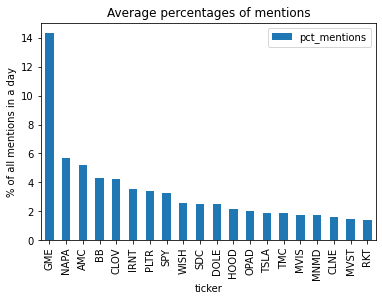

In [880]:
# making a chart off of num_mentions (above)

plt.figure(figsize=(12,6)) 
df_pct_mentions.head(20).plot(kind='bar')
plt.title('Average percentages of mentions')
plt.ylabel('% of all mentions in a day')

In [881]:
df_pct_mentions.head()

,pct_mentions
ticker,
GME,14.313517
NAPA,5.666667
AMC,5.219386
BB,4.298898
CLOV,4.245268


NAPA seems like an outlier with few data points

In [882]:
#check how many data points NAPA has and can remove for consideration if it is
df[df.index == 'NAPA']

,date,url,num_mentions,pct_mentions,pos_count,neg_count,bullish_pct,bearish_pct,neutral_pct,price,price_change_net,price_change_pct,time_of_price
ticker,,,,,,,,,,,,,
NAPA,2021-03-23,https://finance.yahoo.com/quote/NAPA?p=NAPA,10,0.005,7,0,0.7,0.0,0.3,19.40,0.40,2.11,At close: 4:00PM EDT
NAPA,2021-04-07,https://finance.yahoo.com/quote/NAPA?p=NAPA,1,0.005,1,0,1.0,0.0,0.0,17.54,0.02,0.11,At close: 4:00PM EDT
NAPA,2021-07-16,https://finance.yahoo.com/quote/NAPA?p=NAPA,288,0.160,288,0,1.0,0.0,0.0,20.69,-0.68,-3.16,As of 1:12PM EDT. Market open.


Explore the # of times a stock was mentioned in a predicted positive context for all the days rolled up
- also do the same for the negative context for all the days rolled up
- GME, BB, AMC once again are the top 3

In [883]:
#sort by pos_count rolled up into ticker
df_pos_count =df.sort_values(["pos_count","ticker"],ascending=False).groupby("ticker")
df_pos_count = df.groupby('ticker')['pos_count'].sum().sort_values(ascending=False)
df_pos_count.head(5)

ticker
GME     82468
BB      23701
AMC     20712
PLTR    11266
WISH     7968
Name: pos_count, dtype: int64

In [885]:
#sort by neg_count rolled up into ticker
df_neg_count =df.sort_values(["neg_count","ticker"],ascending=False).groupby("ticker")
df_neg_count = df.groupby('ticker')['neg_count'].sum().sort_values(ascending=False)
df_neg_count.head(5)

#df_neg_count.to_csv('test.csv')

ticker
GME     46673
AMC     10555
BB      10291
PLTR     6341
TSLA     3498
Name: neg_count, dtype: int64

Seems like the same top 3 names come up.  What is the ratio of positive context vs all pos/neg context?
* Going to select GME, AMC and BB for further analysis since they seem to be the most talked about names on reddit
* over the course of the period, the context was more skewed positive than negative for each of these names

In [886]:
#create new dataframe to get calculation ready
df_total_count = pd.DataFrame(zip(df.index, df.pos_count, df.neg_count))
df_total_count.rename(columns={0:'ticker', 1:'pos_count', 2:'neg_count'}, inplace=True)
df_total_count.set_index('ticker', inplace=True)

#create the sum of the pos_count and neg_count
sum_col = df_total_count['pos_count'] + df_total_count['neg_count']
df_total_count['total_count'] = sum_col
df_total_count

#create the ratio of the pos_count over total_count
ratio_col = (df_total_count['pos_count'] / df_total_count['total_count']) * 100
df_total_count['ratio'] = ratio_col

#sort and average the daily ratio
df_total_count1 = df_total_count.sort_values(["total_count","ticker"],ascending=False).groupby("ticker")
df_total_count1 = df_total_count.groupby('ticker')[['total_count','ratio']].mean().sort_values(by='total_count',ascending=False)
df_total_count1.head(3)

,total_count,ratio
ticker,,
GME,547.207627,64.357597
BB,144.033898,69.597161
AMC,142.122727,61.975374


Want to look at the volume Year-over-Year (YoY) for each of these names individually and see if trading activity picked up
- Will take total monthly volume from Jan-Sept for 2020 and compare it to 2021
- This will normalize any events such as expiration dates, company earnings, etc..
- If there was more talk about these names on reddit and people there traded these names, should see elevated trading volume

In [887]:
#function to read both dataframes and merge them based on ticker

def vol_merge(ticker):
    #read in both 2020 and 2021
    str1 = f'{ticker}_volume20.csv'
    str2 = f'{ticker}_volume21.csv'
    
    df = pd.read_csv(str1, parse_dates=['Date'])
    df1 = pd.read_csv(str2, parse_dates=['Date'])
                      
    #strip the year from the date so we can merge the 2 dataframes
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df1['Date'] = df1['Date'].dt.strftime('%m-%d')

    #reset index column to date
    df.set_index('Date')
    df1.set_index('Date')
    
    #merge the two dataframes by index (Date)
    df2 = pd.merge(left=df, left_index=True, right=df1, right_index=True, how='inner')
    
    #rename columns to avoid confusion
    df3 = df2.rename(columns={'Date_x': 'Date','Adj Close_x':'Adj Close_20','Volume_x':'Vol_20',
                              'Adj Close_y':'Adj Close_21','Volume_y':'Vol_21'})
    df3.round({"Vol_20":2})
    
    #create new column that calculates YoY change in the volume
    vol_change = (df3['Vol_21'] - df3['Vol_20']) / (df3['Vol_20']) * 100
    df3['Volume Change'] = vol_change
    
    #create new column that will contain the prior month's closing price
    df3['prior_Adj_Close'] = df3['Adj Close_21'].shift(1)
    #now calculate monthly returns
    monthly_return = (df3['Adj Close_21'] - df3['prior_Adj_Close']) / (df3['prior_Adj_Close']) * 100
    df3['Monthly Return'] = monthly_return
    
    # round all numbers 2 decimal places
    df4 = df3.round(2)
    
    #delete 12/01 row since we are not using it for our analysis (didn't have many datapoints)
    df4.drop(df4[df4.Date == '12-01'].index, inplace=True)

    return df4

In [888]:
df_GME = vol_merge('GME')
df_AMC = vol_merge('AMC')
df_BB = vol_merge('BB')

In [889]:
#creating new dataframe to merge monthly pricing with monthly num_mentions
df1 = pd.read_csv('WSB.csv')
df1.date = pd.to_datetime(df1.date)

#create new column to group month by
df1['Date'] = df1['date'].dt.month
df1['Date'] = df1['Date'].astype(str)
df1['Date'] = df1['Date'].replace({'12':'12-01','1':'01-01','2':'02-01','3':'03-01','4':'04-01','5':'05-01',
                                  '6':'06-01','7':'07-01','8':'08-01','9':'09-01','10':'10-01'})
#create new df that contains the columns we need
columns_titles = ["ticker","Date","num_mentions"]
df1=df1.reindex(columns=columns_titles)

#aggregate the data by ticker and month
df1 = df1.groupby(['ticker','Date'])[['num_mentions']].sum()
df1.to_csv("monthly.csv")
df1 = pd.read_csv('monthly.csv')

#filter out for GME, AMC and BB stocks only
df1 = df1[(df1.ticker == 'GME') | (df1.ticker =='AMC') | (df1.ticker =='BB')]

#delete 12/01 and 10/01 row since we are not using it for our analysis (didn't have many datapoints)
df1.drop(df1[df1.Date == '12-01'].index, inplace=True)
df1.drop(df1[df1.Date == '10-01'].index, inplace=True)

In [890]:
# Need to transfer the num_mentions col to each df_GME, df_AMC, df_BB
num_filter = df1[(df1.ticker == 'GME')]
num_mentions = num_filter[['num_mentions']]
num_mentions.index = df_GME.index
df_GME['num_mentions'] = num_mentions

num_filter = df1[(df1.ticker == 'AMC')]
num_mentions = num_filter[['num_mentions']]
num_mentions.index = df_AMC.index
df_AMC['num_mentions'] = num_mentions

num_filter = df1[(df1.ticker == 'BB')]
num_mentions = num_filter[['num_mentions']]
num_mentions.index = df_BB.index
df_BB['num_mentions'] = num_mentions

Time to graph change in volume, return on price, total number of mentions monthly to visualize the results

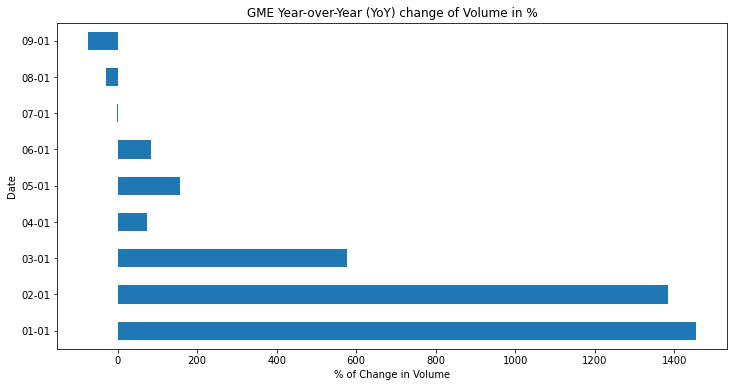

In [891]:
#GME Volume
plt.figure(figsize = (12,6))
plt.title("GME Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_GME.set_index("Date")["Volume Change"].plot.barh()

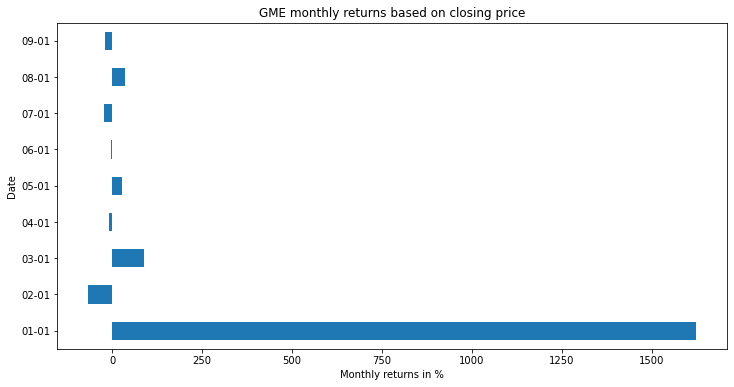

In [892]:
#GME Returns
plt.figure(figsize = (12,6))
plt.title("GME monthly returns based on closing price")
plt.xlabel('Monthly returns in %')
df_GME.set_index("Date")["Monthly Return"].plot.barh()

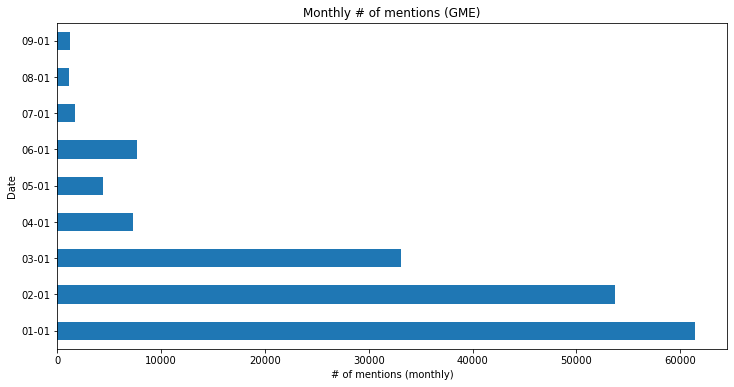

In [893]:
#GME num_mentions
plt.figure(figsize = (12,6))
plt.title("Monthly # of mentions (GME)")
plt.xlabel('# of mentions (monthly)')
df_GME.set_index("Date")["num_mentions"].plot.barh()

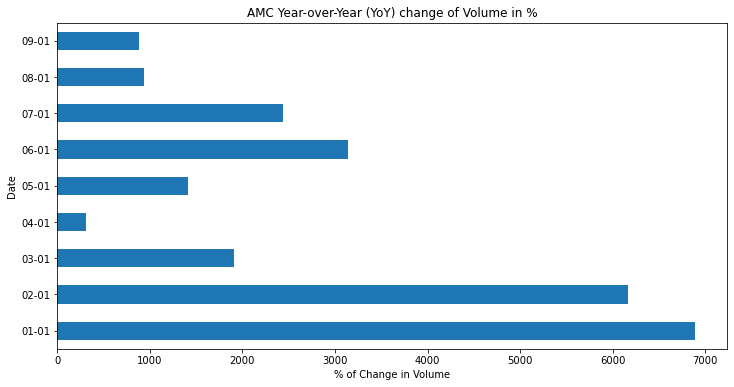

In [894]:
#AMC Volume
plt.figure(figsize = (12,6))
plt.title("AMC Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_AMC.set_index("Date")["Volume Change"].plot.barh()

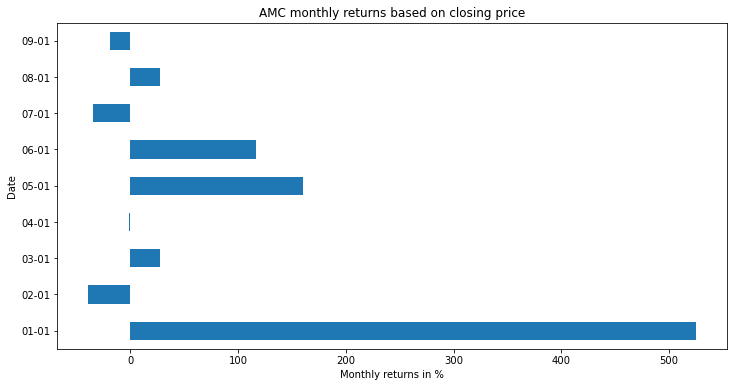

In [895]:
#AMC Returns
plt.figure(figsize = (12,6))
plt.title("AMC monthly returns based on closing price")
plt.xlabel('Monthly returns in %')
df_AMC.set_index("Date")["Monthly Return"].plot.barh()

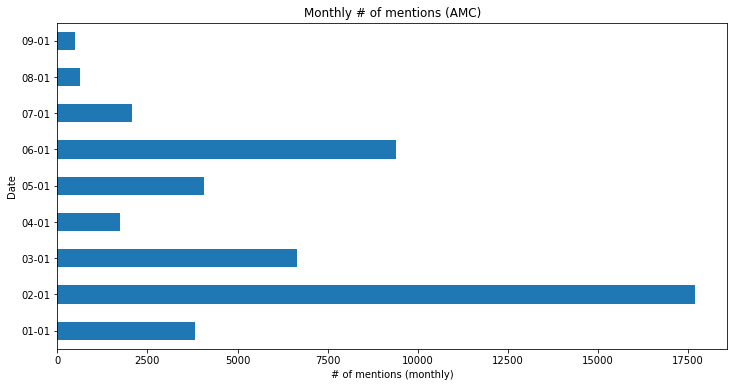

In [896]:
#AMC num_mentions
plt.figure(figsize = (12,6))
plt.title("Monthly # of mentions (AMC)")
plt.xlabel('# of mentions (monthly)')
df_AMC.set_index("Date")["num_mentions"].plot.barh()

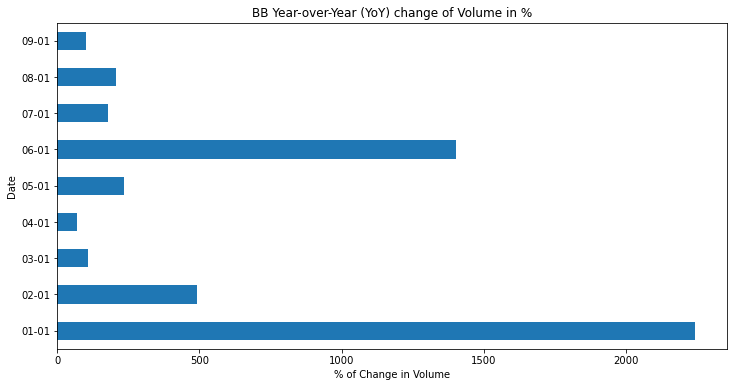

In [897]:
#BB Volume
plt.figure(figsize = (12,6))
plt.title("BB Year-over-Year (YoY) change of Volume in %")
plt.xlabel('% of Change in Volume')
df_BB.set_index("Date")["Volume Change"].plot.barh()

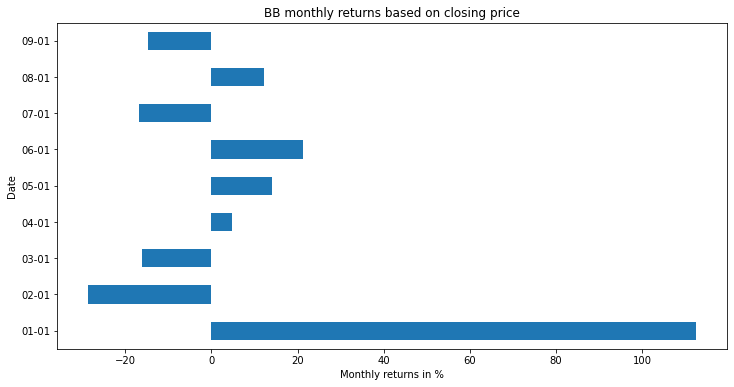

In [898]:
#BB Returns
plt.figure(figsize = (12,6))
plt.title("BB monthly returns based on closing price")
plt.xlabel('Monthly returns in %')
df_BB.set_index("Date")["Monthly Return"].plot.barh()

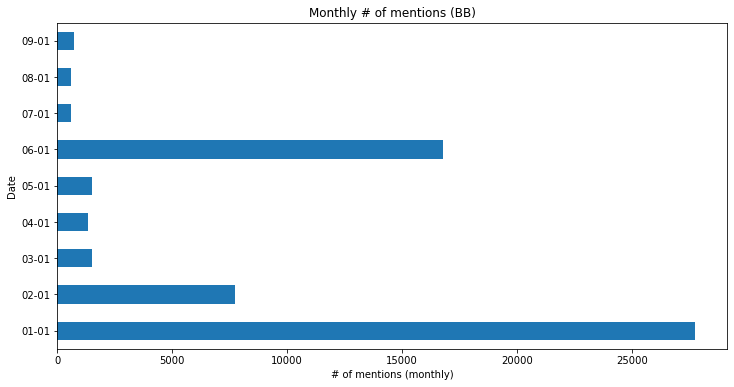

In [899]:
#BB num_mentions
plt.figure(figsize = (12,6))
plt.title("Monthly # of mentions (BB)")
plt.xlabel('# of mentions (monthly)')
df_BB.set_index("Date")["num_mentions"].plot.barh()

EVERYTHING BELOW WAS EXTRA CODE THAT WAS NOT USED:
- stock charts
- return over the whole period of the original data

In [901]:
#creating new dataframe to merge monthly pricing with monthly num_mentions

df1 = pd.read_csv('WSB.csv')
df1.date = pd.to_datetime(df1.date)

#create new column to group month by
df1['Date'] = df1['date'].dt.month
df1['Date'] = df1['Date'].astype(str)
df1['Date'] = df1['Date'].replace({'12':'12-01','1':'01-01','2':'02-01','3':'03-01','4':'04-01','5':'05-01',
                                  '6':'06-01','7':'07-01','8':'08-01','9':'09-01','10':'10-01'})
#create new df that contains the columns we need
columns_titles = ["ticker","Date","num_mentions"]
df1=df1.reindex(columns=columns_titles)

#aggregate the data by ticker and month
df1 = df1.groupby(['ticker','Date'])[['num_mentions']].sum()
df1.to_csv("monthly.csv")
df1 = pd.read_csv('monthly.csv')

#filter out for GME, AMC and BB stocks only
df1 = df1[(df1.ticker == 'GME') | (df1.ticker =='AMC') | (df1.ticker =='BB')]

In [902]:
def stock_return(stock):
    
    #read the csv file and returns rate of return in percentage
    df = pd.read_csv(stock)
    #return = (current px - initial px) / initial px * 100
    return ((df.iloc[-1]['Adj Close'] - df.iloc[0]['Adj Close']) / df.iloc[0]['Adj Close']) * 100

In [903]:
stock_return("GME.csv").round(2)

722.68

In [904]:
stock_return("AMC.csv").round(2)

1456.07

In [905]:
stock_return("BB.csv").round(2)

36.48

In [906]:
# created function to produce simple stock charts
def stock_chart(csv):
    
    #read file and convert into datetime
    df_temp = pd.read_csv(csv, parse_dates=['Date'])

    return df_temp.set_index("Date")["Adj Close"].plot()

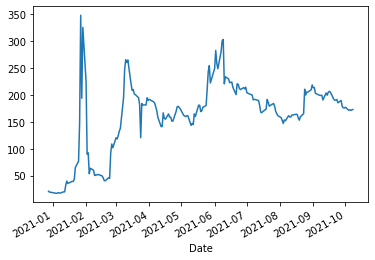

In [907]:
stock_chart('GME.csv')

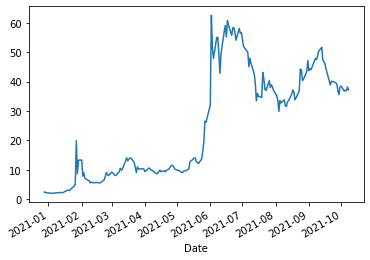

In [908]:
stock_chart('AMC.csv')

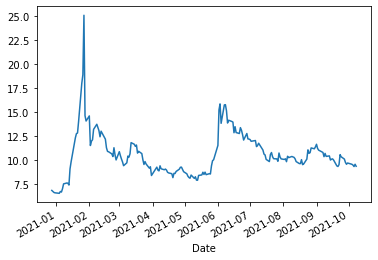

In [911]:
stock_chart('BB.csv')